In [1]:
## this script reads a pdf file and creates a word cloud

import fitz  # PyMuPDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
import os
import PyPDF2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the necessary data for tokenization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

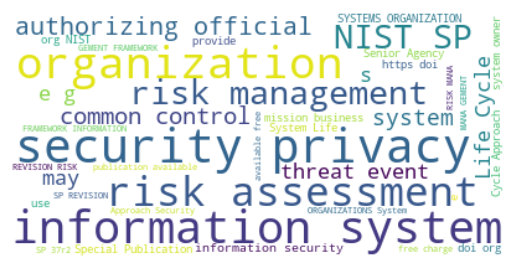

In [4]:
def read_pdf(file_path):
    text = ''
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

def generate_word_cloud(text):
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#def remove_words(text, words_to_remove):
    #for word in words_to_remove:
        #text = text.replace(word, '')
    #return text

def remove_words(text, words_to_remove):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in words_to_remove]
    return ' '.join(filtered_tokens)

# Construct the full paths to the PDF files
pdf_file_path_1 = os.path.join('/app/notebooks', 'nist80030.pdf')
pdf_file_path_2 = os.path.join('/app/notebooks', 'nist80037.pdf')

# Read text from both PDF files and concatenate
pdf_text_combined = read_pdf(pdf_file_path_1) + read_pdf(pdf_file_path_2)

# Specify words to be removed
words_to_remove = ['the', 'and', 'of', 'in', 'to', 'a', 'is', 'for', 'with']

# Remove specified words
pdf_text_filtered = remove_words(pdf_text_combined, words_to_remove)

# Generate a word cloud from the filtered text
generate_word_cloud(pdf_text_filtered)

In [10]:
#save the word cloud into a .png
# Save the WordCloud as a .png file
wordcloud.to_file("wordcloudFCombine.png")

In [11]:
print("Current working directory:", os.getcwd())

Current working directory: /app/notebooks


In [10]:
##To get it out of the container could be tricky
##In a Debian linux system like Ubuntu, use the 'cp' command to move it. 
##I used sudo docker cp 'containerID':/app/wordcloud.png /path/to/destination/file/wordcloud.png